In [63]:
import pandas as pd

import sklearn

import rdkit
from rdkit import Chem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import numpy as np
import datamol as dm

from tqdm import tqdm

In [11]:
print(rdkit.__version__)


2023.03.1


NameError: name 'python' is not defined

In [4]:
random_state = 42

In [25]:
db = pd.read_csv('./curated-solubility-dataset.csv')
db.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [26]:
aqsol = db[['ID', 'Name', 'SMILES', 'Solubility']].copy()
aqsol.head()

,ID,Name,SMILES,Solubility
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,A-4,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
2,A-5,4-chlorobenzaldehyde,Clc1ccc(C=O)cc1,-2.177078
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065


In [27]:
aqsol['SMILES'] = aqsol['SMILES'].map(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))
aqsol['mols'] = aqsol['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
aqsol.head()

,ID,Name,SMILES,Solubility,mols
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127,<rdkit.Chem.rdchem.Mol object at 0x14900a75f300>
1,A-4,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767,<rdkit.Chem.rdchem.Mol object at 0x14900c1705f0>
2,A-5,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078,<rdkit.Chem.rdchem.Mol object at 0x14900c170660>
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409,<rdkit.Chem.rdchem.Mol object at 0x14900c1706d0>
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,<rdkit.Chem.rdchem.Mol object at 0x14900c170740>


In [28]:
desc_0d_df = dm.descriptors.batch_compute_many_descriptors(aqsol['mols'], n_jobs = 8, batch_size = 'auto')
desc_0d_df

[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:04] WARNING: not removing hydrogen atom without neighbors
[14:08:05] WARNING: not removing hydrogen atom without neighbors
[14:08:05] WARNING: not removing hydrogen atom without neighbors
[14:08:05] WARNING: not removing hydrogen atom without neighbors
[14:08:05] WARNING: not removing hydrogen atom without neighbors
[14:08:05] WARNING: not r

,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,n_radical_electrons,tpsa,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,391.281363,1.000000,1,0,0,2,23,17,0,0.00,...,2.039968,0,0,0,0,0,0,0,0,0
1,169.052764,0.000000,2,1,3,2,13,0,0,29.10,...,1.994874,0,1,1,2,0,2,0,0,0
2,140.002892,0.000000,1,0,1,2,9,1,0,17.07,...,1.561055,0,0,0,1,0,1,0,0,0
3,754.227281,0.173913,6,2,6,7,53,10,0,120.72,...,4.209538,0,0,0,6,0,6,0,0,0
4,422.220557,0.520000,6,0,6,6,31,12,0,56.60,...,3.753237,0,4,4,2,0,2,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,264.183778,0.533333,4,1,1,4,19,8,0,41.57,...,1.821189,0,0,0,1,0,1,0,0,0
9978,444.153266,0.409091,10,7,4,10,32,2,0,181.62,...,4.469707,3,0,3,1,0,1,0,0,0
9979,150.104465,0.400000,1,1,1,1,11,1,0,20.23,...,1.828702,0,0,0,1,0,1,0,0,0
9980,454.283158,0.518519,6,0,2,6,33,13,0,63.95,...,2.941048,0,0,0,2,0,2,0,0,0


In [29]:
aqsol_0d = pd.merge(aqsol, desc_0d_df, right_index = True, left_index = True)
aqsol_0d.head()

,ID,Name,SMILES,Solubility,mols,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127,<rdkit.Chem.rdchem.Mol object at 0x14900a75f300>,391.281363,1.000000,1,0,0,...,2.039968,0,0,0,0,0,0,0,0,0
1,A-4,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767,<rdkit.Chem.rdchem.Mol object at 0x14900c1705f0>,169.052764,0.000000,2,1,3,...,1.994874,0,1,1,2,0,2,0,0,0
2,A-5,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078,<rdkit.Chem.rdchem.Mol object at 0x14900c170660>,140.002892,0.000000,1,0,1,...,1.561055,0,0,0,1,0,1,0,0,0
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409,<rdkit.Chem.rdchem.Mol object at 0x14900c1706d0>,754.227281,0.173913,6,2,6,...,4.209538,0,0,0,6,0,6,0,0,0
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,<rdkit.Chem.rdchem.Mol object at 0x14900c170740>,422.220557,0.520000,6,0,6,...,3.753237,0,4,4,2,0,2,0,4,4


<Axes: >

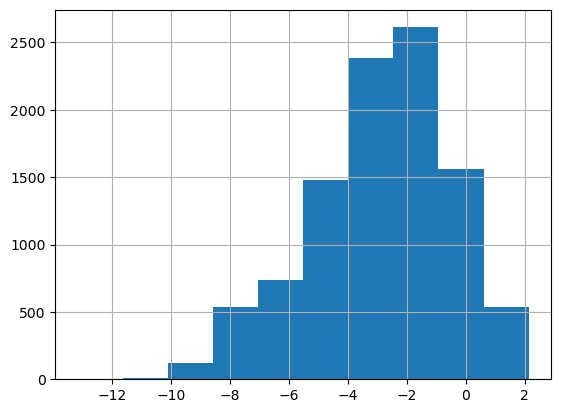

In [30]:
aqsol_0d['Solubility'].hist()

In [31]:
aqsol_0d['sol_class'] = aqsol_0d['Solubility'].map(lambda x: 1 if x < -3 else -1)
aqsol_0d.head()

,ID,Name,SMILES,Solubility,mols,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,...,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings,sol_class
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127,<rdkit.Chem.rdchem.Mol object at 0x14900a75f300>,391.281363,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A-4,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767,<rdkit.Chem.rdchem.Mol object at 0x14900c1705f0>,169.052764,0.000000,2,1,3,...,0,1,1,2,0,2,0,0,0,1
2,A-5,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078,<rdkit.Chem.rdchem.Mol object at 0x14900c170660>,140.002892,0.000000,1,0,1,...,0,0,0,1,0,1,0,0,0,-1
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409,<rdkit.Chem.rdchem.Mol object at 0x14900c1706d0>,754.227281,0.173913,6,2,6,...,0,0,0,6,0,6,0,0,0,1
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,<rdkit.Chem.rdchem.Mol object at 0x14900c170740>,422.220557,0.520000,6,0,6,...,0,4,4,2,0,2,0,4,4,1


In [32]:
print(len(aqsol_0d[aqsol_0d['sol_class'] == -1]))

5687


In [33]:
print(len(aqsol_0d))

9982


In [34]:
aqsol_0d = aqsol_0d.drop_duplicates()

---

In [35]:
Y = aqsol_0d['sol_class']
aqsol_0d = aqsol_0d.drop(['ID', 'Name', 'SMILES', 'Solubility', 'mols', 'sol_class'], axis = 1)
aqsol_0d.head()

,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,n_radical_electrons,tpsa,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
0,391.281363,1.000000,1,0,0,2,23,17,0,0.00,...,2.039968,0,0,0,0,0,0,0,0,0
1,169.052764,0.000000,2,1,3,2,13,0,0,29.10,...,1.994874,0,1,1,2,0,2,0,0,0
2,140.002892,0.000000,1,0,1,2,9,1,0,17.07,...,1.561055,0,0,0,1,0,1,0,0,0
3,754.227281,0.173913,6,2,6,7,53,10,0,120.72,...,4.209538,0,0,0,6,0,6,0,0,0
4,422.220557,0.520000,6,0,6,6,31,12,0,56.60,...,3.753237,0,4,4,2,0,2,0,4,4


In [36]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(aqsol_0d, Y, train_size = 0.9, random_state=random_state)

In [37]:
x_train

,mw,fsp3,n_lipinski_hba,n_lipinski_hbd,n_rings,n_hetero_atoms,n_heavy_atoms,n_rotatable_bonds,n_radical_electrons,tpsa,...,sas,n_aliphatic_carbocycles,n_aliphatic_heterocyles,n_aliphatic_rings,n_aromatic_carbocycles,n_aromatic_heterocyles,n_aromatic_rings,n_saturated_carbocycles,n_saturated_heterocyles,n_saturated_rings
7238,151.063329,0.125000,3,2,1,3,11,2,0,52.32,...,1.462462,0,0,0,1,0,1,0,0,0
2127,72.057515,0.750000,1,0,0,1,5,2,0,17.07,...,2.734983,0,0,0,0,0,0,0,0,0
6129,221.041526,0.875000,2,2,0,3,11,5,0,43.09,...,3.197251,0,0,0,0,0,0,0,0,0
8201,305.917276,0.000000,1,0,2,5,17,2,0,9.23,...,1.826144,0,0,0,2,0,2,0,0,0
960,246.009104,0.666667,0,0,0,9,15,3,0,0.00,...,3.025687,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,230.151809,0.833333,4,2,0,4,16,7,0,74.60,...,2.653215,0,0,0,0,0,0,0,0,0
5191,256.125201,0.100000,0,0,4,0,20,1,0,0.00,...,1.826188,0,0,0,4,0,4,0,0,0
5390,292.025084,0.000000,6,2,2,7,20,3,0,92.47,...,1.716195,0,0,0,2,0,2,0,0,0
860,149.990419,0.333333,0,0,0,6,9,0,0,0.00,...,3.372386,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
c0_svm = svm.SVC(random_state=42)
c0_svm.fit(x_train, y_train)

SVC(random_state=42)

In [40]:
y_train_pred = c0_svm.predict(x_train)
y_test_pred = c0_svm.predict(x_test)

In [45]:
print(f'Model train set accuracies: {len([x for ind, x in enumerate(y_train_pred) if x ==  list(y_train)[ind]])/len(y_train)}')
print(f'Model test set accuracies: {len([x for ind, x in enumerate(y_test_pred) if x ==  list(y_test)[ind]])/len(y_test)}')

Model train set accuracies: 0.7892686185016141
Model test set accuracies: 0.8048048048048048


In [46]:
c0_svm.score(x_test, y_test)

0.8048048048048048

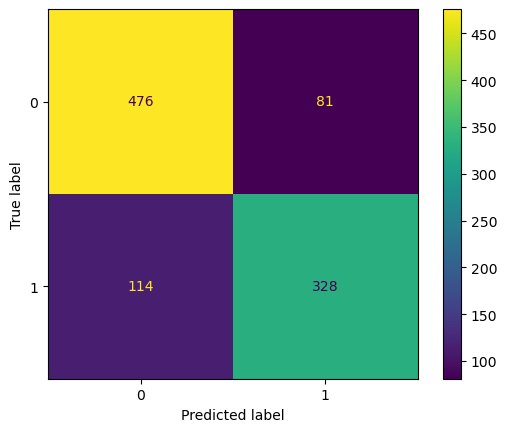

In [49]:
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [51]:
pipe = make_pipeline(StandardScaler(), svm.SVC(random_state=random_state))
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

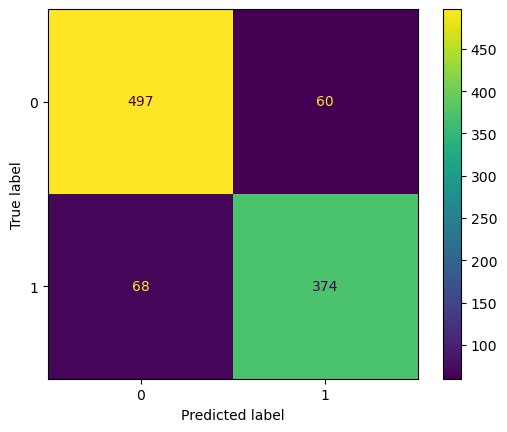

In [52]:
pipe_train_pred = pipe.predict(x_train)
pipe_test_pred = pipe.predict(x_test)

cm = confusion_matrix(y_test, pipe_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display

In [53]:
pipe.score(x_test, y_test)

0.8718718718718719

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

In [58]:
scores = cross_val_score(pipe, x_train, y_train, cv = 5)

In [59]:
print(scores.mean(), scores.std())

0.8563952169726082 0.00735289550891485


In [60]:
r = permutation_importance(pipe, x_test, y_test, n_repeats= 30, random_state = random_state)

In [62]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2*r.importances_std[i] > 0:
        print(x_test.columns[i], '\t', f'{r.importances_mean[i]:.3f}')

clogp 	 0.267
mw 	 0.040
n_heavy_atoms 	 0.023
n_lipinski_hba 	 0.019
n_lipinski_hbd 	 0.016
qed 	 0.014
sas 	 0.013
n_hetero_atoms 	 0.012
tpsa 	 0.011
n_aliphatic_heterocyles 	 0.008
n_aliphatic_carbocycles 	 0.007
n_radical_electrons 	 0.005
n_aromatic_heterocyles 	 0.005
